In [1]:
%config Completer.use_jedi = False

# 다음 사건사고가 발생하기까지 걸리는 시간

### Data
이 문제에서는 Austine시에서 발생한 사건⠂사고와 관련된 데이터가 주어집니다. 주어지는 column 은 다음과 같습니다.

* unique_key: 사건⠂사고를 구분하는 유니크한 key
* descript: 사건⠂사고 유형(강도, 음주운전 등)
* address: 사건⠂사고 발생 주소
* location: 사건⠂사고 발생 위치(위도, 경도)
* timestamp: 사건⠂사고 발생일시. YYYY-MM-DD hh:mm:ss 형식


In [2]:
# 초기코드 - python

# 모듈 import
import pandas as pd

# 데이터 로드
df = pd.read_csv('./data/austine-incidents.csv', low_memory=False, index_col='unique_key')
df.head()

,descript,address,location,timestamp
unique_key,,,,
2016160158,POSS OF DRUG PARAPHERNALIA,7500 BLOCK N IH 35 SVRD SB,NaN,2016-01-16 01:09:00
20165001577,BURGLARY OF VEHICLE,1400 BLOCK BRIARCLIFF BLVD,NaN,2016-01-11 20:30:00
20165002896,IDENTITY THEFT-TAX RETURNS,200 BLOCK ELKHART ST,NaN,2016-01-21 14:00:00
20168000234,CRIMINAL MISCHIEF,3500 BLOCK NORTH HILLS DR,NaN,2016-01-16 20:10:00
20168000074,THEFT,4700 BLOCK STAGGERBRUSH RD,NaN,2015-12-18 20:05:00


# 과제

주어진 데이터를 활용해, 어떤 사건⠂사고가 발생한 후 다음 사건⠂사고가 발생하기까지 걸리는 시간을 알아보려 합니다.
  
## 할 일

##### 1. 다음 사건⠂사고가 발생하기까지 걸린 시간 측정하기

어떤 사건⠂사고가 발생한 시간과 이전 사건⠂사고가 발생한 시간의 차를 분단위로 `duration(m)` 컬럼에 저장해주세요. 첫 사건⠂사고는 이전 사건⠂사고가 없을 테니, 이 첫 사건⠂사고에 대한 row는 제외해주세요. 

정상적으로 코드를 작성했다면, row의 수는 9999개이며, 결과는 다음과 같이 나옵니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>descript</th>
      <th>address</th>
      <th>location</th>
      <th>timestamp</th>
      <th>duration(m)</th>
    </tr>
    <tr>
      <th>unique_key</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2016530815</th>
      <td>THEFT</td>
      <td>700 BLOCK RIO GRANDE ST</td>
      <td>NaN</td>
      <td>2015-02-20 12:00:00</td>
      <td>2557.0</td>
    </tr>
    <tr>
      <th>20165013579</th>
      <td>OUT OF CITY OFFENSE</td>
      <td>12300 BLOCK ALAMEDA TRACE CIR</td>
      <td>NaN</td>
      <td>2015-02-23 12:00:00</td>
      <td>4320.0</td>
    </tr>
    <tr>
      <th>20165022918</th>
      <td>HARASSMENT</td>
      <td>500 BLOCK W 10TH ST</td>
      <td>NaN</td>
      <td>2015-02-24 11:09:00</td>
      <td>1389.0</td>
    </tr>
    <tr>
      <th>20168001525</th>
      <td>IDENTITY THEFT</td>
      <td>11400 BLOCK ROBERT WOODING DR</td>
      <td>NaN</td>
      <td>2015-02-24 15:55:00</td>
      <td>286.0</td>
    </tr>
    <tr>
      <th>20165008223</th>
      <td>LOST PROP</td>
      <td>3200 BLOCK FEATHERGRASS CT</td>
      <td>NaN</td>
      <td>2015-02-25 20:00:00</td>
      <td>1685.0</td>
    </tr>
  </tbody>
</table>

In [3]:
# 여기에 코드를 작성하세요.
print(len(df))
df.info()

10000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2016160158 to 20165001379
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   descript   10000 non-null  object
 1   address    10000 non-null  object
 2   location   670 non-null    object
 3   timestamp  10000 non-null  object
dtypes: object(4)
memory usage: 390.6+ KB


- location 에서  결측치 발견
- 나머지 데이터 결측치 없음

## 정렬

In [4]:
df.sort_values("timestamp", inplace = True)
df.head()

,descript,address,location,timestamp
unique_key,,,,
20165007117,HARASSMENT,2400 BLOCK MAGIN MEADOW DR,NaN,2015-02-18 17:23:00
2016530815,THEFT,700 BLOCK RIO GRANDE ST,NaN,2015-02-20 12:00:00
20165013579,OUT OF CITY OFFENSE,12300 BLOCK ALAMEDA TRACE CIR,NaN,2015-02-23 12:00:00
20165022918,HARASSMENT,500 BLOCK W 10TH ST,NaN,2015-02-24 11:09:00
20168001525,IDENTITY THEFT,11400 BLOCK ROBERT WOODING DR,NaN,2015-02-24 15:55:00


## Year, Month, Date 를 정수로 추출

In [5]:
df["YMD"] = sum([
    (df["timestamp"].map(lambda x : int(x[:4])) - 2015) * 365,
    df["timestamp"].map(lambda x : int(x[5:7])) * 30,
    df["timestamp"].map(lambda x : int(x[8:10]))
])
df.head()

,descript,address,location,timestamp,YMD
unique_key,,,,,
20165007117,HARASSMENT,2400 BLOCK MAGIN MEADOW DR,NaN,2015-02-18 17:23:00,78
2016530815,THEFT,700 BLOCK RIO GRANDE ST,NaN,2015-02-20 12:00:00,80
20165013579,OUT OF CITY OFFENSE,12300 BLOCK ALAMEDA TRACE CIR,NaN,2015-02-23 12:00:00,83
20165022918,HARASSMENT,500 BLOCK W 10TH ST,NaN,2015-02-24 11:09:00,84
20168001525,IDENTITY THEFT,11400 BLOCK ROBERT WOODING DR,NaN,2015-02-24 15:55:00,84


In [6]:
df.tail()

,descript,address,location,timestamp,YMD
unique_key,,,,,
2016221295,FOUND PROPERTY,600 BLOCK NECHES ST,NaN,2016-01-22 17:00:00,417
20165003154,CRASH/LEAVING THE SCENE,13700 BLOCK N SH 45 W WB,NaN,2016-01-22 17:00:00,417
2016221575,CRIMINAL MISCHIEF,1700 BLOCK W PARMER LN,NaN,2016-01-22 17:00:00,417
2016221260,POSS CONTROLLED SUB/NARCOTIC,300 BLOCK COMAL ST,NaN,2016-01-22 17:13:00,417
2016221262,FAMILY DISTURBANCE,1900 BLOCK HEARTHSTONE DR,NaN,2016-01-22 17:14:00,417


- 1개월 이상 차이가 나는 경우가 있는지 찾는다.

In [7]:
del_YMD = {
    "del_YMD" : df.YMD.to_numpy()[1:] - df.YMD.to_numpy()[:-1]
}
del_YMD = pd.DataFrame(del_YMD)
del_YMD.head()

,del_YMD
0,2
1,3
2,1
3,0
4,1


In [8]:
del_YMD.describe()

,del_YMD
count,9999.000000
mean,0.033903
std,0.236139
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,5.000000


- 1개월을 30일로 잡았을 경우 최대 5일 차이가 나므로 분단위 차이를 구할때 년, 월 을 고려하지 않아도 된다.
- 사실 이것도 필요없는 짓이었다. 시험때는 잔머리 굴리지말고 그냥 무지성으로 빡시게 푸는게 더 좋다. 답을 제출하고 코드를 다듬는게 더 현명한 짓이다.

In [9]:
month_table = {
    '01' : 0, #31,
    '02' : 31,  #28,
    '03' : 31 + 28,  #31,
    '04' : 31 + 28 + 31,  #30,
    '05' : 31 + 28 + 31 + 30,  #31,
    '06' : 31 + 28 + 31 + 30 + 31,  #30,
    '07' : 31 + 28 + 31 + 30 + 31 + 30,  #31,
    '08' : 31 + 28 + 31 + 30 + 31 + 30 + 31,  #31,
    '09' : 31 + 28 + 31 + 30 + 31 + 30 + 31 + 31,  #30,
    '10' : 31 + 28 + 31 + 30 + 31 + 30 + 31 + 31 + 30,  #31,
    '11' : 31 + 28 + 31 + 30 + 31 + 30 + 31 + 31 + 30 + 31,  #30,
    '12' : 31 + 28 + 31 + 30 + 31 + 30 + 31 + 31 + 30 + 31 + 30, #31,
}

- 알고보니 DP 문제였다 ㅅㅂ

In [10]:



df["DHM"] = sum([
    df["timestamp"].map(lambda x : (int(x[  : 4]) - 1) * 60 * 24 * 365), # Year
    df["timestamp"].map(lambda x : month_table[x[ 5: 7]]) * 60 * 24, # Month
    df["timestamp"].map(lambda x : (int(x[ 8:10]) - 1) * 60 * 24), # Date
    df["timestamp"].map(lambda x : int(x[11:13]) * 60), # Hour
    df["timestamp"].map(lambda x : int(x[14:16])), # Min
    # df["timestamp"].map(lambda x : int(x[14:16])) / 60, # Sec
    
]).astype(float)
df.head()

,descript,address,location,timestamp,YMD,DHM
unique_key,,,,,,
20165007117,HARASSMENT,2400 BLOCK MAGIN MEADOW DR,NaN,2015-02-18 17:23:00,78,1.058629e+09
2016530815,THEFT,700 BLOCK RIO GRANDE ST,NaN,2015-02-20 12:00:00,80,1.058631e+09
20165013579,OUT OF CITY OFFENSE,12300 BLOCK ALAMEDA TRACE CIR,NaN,2015-02-23 12:00:00,83,1.058635e+09
20165022918,HARASSMENT,500 BLOCK W 10TH ST,NaN,2015-02-24 11:09:00,84,1.058637e+09
20168001525,IDENTITY THEFT,11400 BLOCK ROBERT WOODING DR,NaN,2015-02-24 15:55:00,84,1.058637e+09


In [11]:
df.index

Int64Index([20165007117,  2016530815, 20165013579, 20165022918, 20168001525,
            20165008223, 20165000634, 20165010763, 20165003526, 20165017152,
            ...
             2016221461,  2016260922, 20165003467, 20165003438,  2016250518,
             2016221295, 20165003154,  2016221575,  2016221260,  2016221262],
           dtype='int64', name='unique_key', length=10000)

In [12]:
del_DHM = {
    "duration(m)" : df.DHM.to_numpy()[1:] - df.DHM.to_numpy()[:-1]
}
del_DHM = pd.DataFrame(del_DHM, index=df.index[1:])
del_DHM.head()

,duration(m)
unique_key,
2016530815,2557.0
20165013579,4320.0
20165022918,1389.0
20168001525,286.0
20165008223,1685.0


In [13]:
df.drop(20165007117, inplace = True)
len(df)

9999

In [14]:
df["duration(m)"] = del_DHM["duration(m)"]
df.head()

,descript,address,location,timestamp,YMD,DHM,duration(m)
unique_key,,,,,,,
2016530815,THEFT,700 BLOCK RIO GRANDE ST,NaN,2015-02-20 12:00:00,80,1.058631e+09,2557.0
20165013579,OUT OF CITY OFFENSE,12300 BLOCK ALAMEDA TRACE CIR,NaN,2015-02-23 12:00:00,83,1.058635e+09,4320.0
20165022918,HARASSMENT,500 BLOCK W 10TH ST,NaN,2015-02-24 11:09:00,84,1.058637e+09,1389.0
20168001525,IDENTITY THEFT,11400 BLOCK ROBERT WOODING DR,NaN,2015-02-24 15:55:00,84,1.058637e+09,286.0
20165008223,LOST PROP,3200 BLOCK FEATHERGRASS CT,NaN,2015-02-25 20:00:00,85,1.058639e+09,1685.0


In [15]:
df.drop(["YMD","DHM"], axis = 1, inplace = True)
df.head()

,descript,address,location,timestamp,duration(m)
unique_key,,,,,
2016530815,THEFT,700 BLOCK RIO GRANDE ST,NaN,2015-02-20 12:00:00,2557.0
20165013579,OUT OF CITY OFFENSE,12300 BLOCK ALAMEDA TRACE CIR,NaN,2015-02-23 12:00:00,4320.0
20165022918,HARASSMENT,500 BLOCK W 10TH ST,NaN,2015-02-24 11:09:00,1389.0
20168001525,IDENTITY THEFT,11400 BLOCK ROBERT WOODING DR,NaN,2015-02-24 15:55:00,286.0
20165008223,LOST PROP,3200 BLOCK FEATHERGRASS CT,NaN,2015-02-25 20:00:00,1685.0


- 예시와 비교


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>descript</th>
      <th>address</th>
      <th>location</th>
      <th>timestamp</th>
      <th>duration(m)</th>
    </tr>
    <tr>
      <th>unique_key</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2016530815</th>
      <td>THEFT</td>
      <td>700 BLOCK RIO GRANDE ST</td>
      <td>NaN</td>
      <td>2015-02-20 12:00:00</td>
      <td>2557.0</td>
    </tr>
    <tr>
      <th>20165013579</th>
      <td>OUT OF CITY OFFENSE</td>
      <td>12300 BLOCK ALAMEDA TRACE CIR</td>
      <td>NaN</td>
      <td>2015-02-23 12:00:00</td>
      <td>4320.0</td>
    </tr>
    <tr>
      <th>20165022918</th>
      <td>HARASSMENT</td>
      <td>500 BLOCK W 10TH ST</td>
      <td>NaN</td>
      <td>2015-02-24 11:09:00</td>
      <td>1389.0</td>
    </tr>
    <tr>
      <th>20168001525</th>
      <td>IDENTITY THEFT</td>
      <td>11400 BLOCK ROBERT WOODING DR</td>
      <td>NaN</td>
      <td>2015-02-24 15:55:00</td>
      <td>286.0</td>
    </tr>
    <tr>
      <th>20165008223</th>
      <td>LOST PROP</td>
      <td>3200 BLOCK FEATHERGRASS CT</td>
      <td>NaN</td>
      <td>2015-02-25 20:00:00</td>
      <td>1685.0</td>
    </tr>
  </tbody>
</table>

##### 2. 이상치 제거

`duration(m)`에는 값이 0이거나, 또는 너무 값이 큰 데이터가 들어있습니다. 이런 이상치와 outlier는 제거해야 합니다. 따라서 `duration(m)`의

* 값이 0 이하거나
* 정규분포에서 -2σ 이하 또는 2σ 이상인 값

을 가지는 데이터는 제거해주세요. 값을 정상적으로 제거했다면 남은 row는 7026개입니다.

In [16]:
# 여기에 코드를 작성하세요.
df.describe()

,duration(m)
count,9999.000000
mean,48.675968
std,289.447585
min,0.000000
25%,0.000000
50%,2.000000
75%,6.000000
max,7390.000000


In [17]:
mean   = df["duration(m)"].mean()
stddev = df["duration(m)"].std()
print(mean)
print(stddev)

48.675967596759676
289.44758488261783


<AxesSubplot:ylabel='Frequency'>

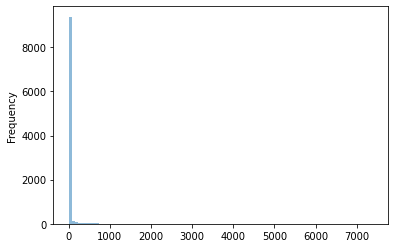

In [18]:
df["duration(m)"].plot.hist(bins = 100, alpha = 0.5)

- 이게 정규분포일리 없다.. 그냥 멍청했다.

In [19]:
df["duration(m)"].value_counts()

0.0       2762
1.0       1312
2.0       1011
3.0        866
4.0        627
          ... 
162.0        1
2400.0       1
206.0        1
3557.0       1
1357.0       1
Name: duration(m), Length: 437, dtype: int64

In [20]:
df = df[
    ( df["duration(m)"] >  0.) & \
    ( df["duration(m)"] > -2 * stddev + mean) & \
    ( df["duration(m)"] <  2 * stddev + mean)
]
df.shape

(7026, 5)

##### 3. 결과 저장

채점을 하기 위해, 위에서 구한 `unique_key`, `duration(m)`을 현재 파일과 같은 디렉토리(.ipynb 파일이 있는 디렉토리)에 `incidents_duration.csv`이라는 이름으로 저장해주세요. 이때

1. `duration(m)`은 소숫점을 버리고, 정수 형식으로 저장
2. `unique_key` 순으로 정렬

해주셔야합니다. 저장할 파일 포맷은 data 디렉토리의 `incidents_duration(sample).csv` 파일을 참고하세요.

*주의* 

1. csv 파일의 컬럼은 반드시 unique_key - duration(m) 순이어야 합니다.
2. **csv 파일은 unique_key 순으로 정렬되어있어야 합니다.**

In [21]:
# 여기에 코드를 작성하세요.
Data = {
    "unique_key"  : df.index,
    "duration(m)" : df["duration(m)"].to_numpy(),
}

df = pd.DataFrame(Data).sort_values("unique_key")
df

,unique_key,duration(m)
797,201610045,1.0
813,201610077,2.0
875,201610079,2.0
811,201610099,6.0
800,201610103,7.0
...,...,...
13,20168003234,540.0
301,20168003287,35.0
29,20168003292,120.0
74,20168003379,489.0


In [22]:
# csv 파일 저장 예시 - python
df.to_csv('incidents_duration.csv', index = False)